In [19]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
voids_TNG = {}
for i in range(100):
    voids_TNG[i] = pd.read_csv('../data/TNG/TNG300-1/web/void_random_{:03d}_subhalo_massive_xyz_subhalo_massive_xyz.csv'.format(i))

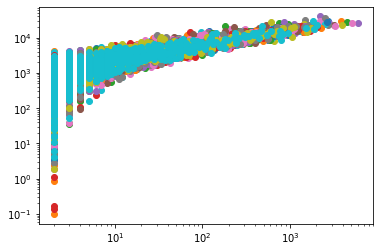

In [21]:
for i in range(20):
    plt.scatter(voids_TNG[i]['N'], voids_TNG[i]['SIGMA_R'])
    plt.loglog()

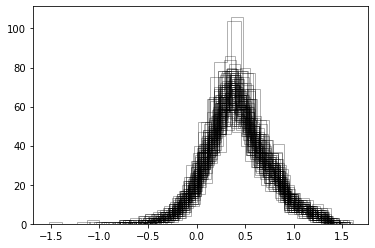

In [39]:
for i in range(100):
    ii = voids_TNG[i]['N']>3
    _ = plt.hist(np.log10(voids_TNG[i]['SIGMA_R'][ii]/1000), 
                 alpha=0.3, log=False, bins=20, histtype='step', color='black')

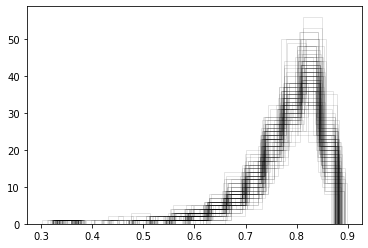

In [23]:
for i in range(100):
    ii = voids_TNG[i]['N']>20
    ell = 1 - np.sqrt(voids_TNG[i]['LAMBDA_3'][ii]/voids_TNG[i]['LAMBDA_1'][ii])
    _ = plt.hist(ell, alpha=0.1, bins=15, histtype='step', color='black')

In [24]:
eigen_values = {}

for v in range(100):
    n_points = len(voids_TNG[v]['N'])
    eigen_1 = np.ones((n_points,3))
    for i in range(n_points):
        eigen_1[i] = np.fromstring(voids_TNG[v]['EIGEN_1'][i][1:-1], sep=' ')
    
    eigen_values[v] = eigen_1

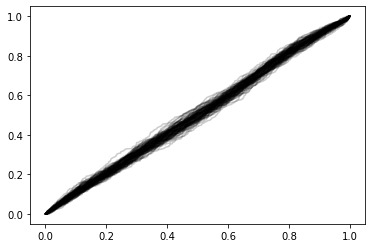

In [25]:
for v in range(100):
    ii = voids_TNG[v]['N']>3
    component = eigen_values[v][ii,0]
    n = len(component)
    int_distro = np.linspace(0,1,n)
    x = np.sort(np.abs(component))
    plt.plot(x, int_distro, color='black', alpha=0.2)

In [26]:
voids_TCW = {}
for i in range(100):
    voids_TCW[i] = pd.read_csv('../data/TCW/web/void_random_{:03d}_fof_catalog_200Mpc512_xyz_fof_catalog_200Mpc512_xyz.csv'.format(i))

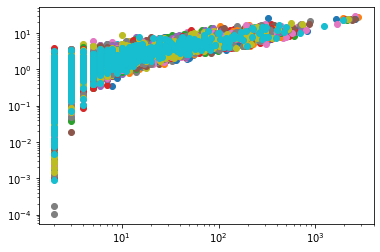

In [27]:
for i in range(20):
    plt.scatter(voids_TCW[i]['N'], voids_TCW[i]['SIGMA_R'])
    plt.loglog()

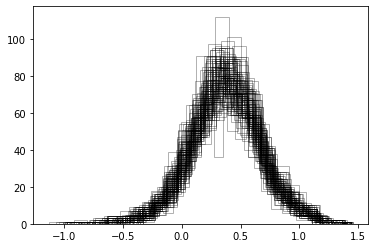

In [40]:
for i in range(100):
    ii = voids_TCW[i]['N']>3
    _ = plt.hist(np.log10(voids_TCW[i]['SIGMA_R'][ii]), 
                 alpha=0.3, log=False, bins=20, histtype='step', color='black')

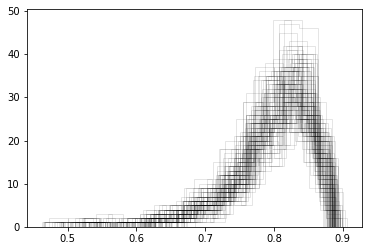

In [29]:
for i in range(100):
    ii = voids_TCW[i]['N']>20
    ell = 1 - np.sqrt(voids_TCW[i]['LAMBDA_3'][ii]/voids_TCW[i]['LAMBDA_1'][ii])
    _ = plt.hist(ell, alpha=0.1, bins=15, histtype='step', color='black')

In [30]:
eigen_values = {}

for v in range(100):
    n_points = len(voids_TCW[v]['N'])
    eigen_1 = np.ones((n_points,3))
    for i in range(n_points):
        eigen_1[i] = np.fromstring(voids_TCW[v]['EIGEN_1'][i][1:-1], sep=' ')
    
    eigen_values[v] = eigen_1

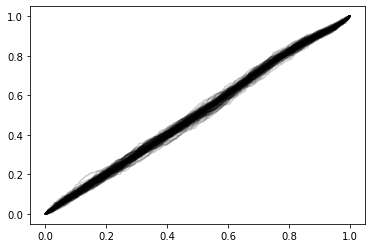

In [31]:
for v in range(100):
    ii = voids_TCW[v]['N']>3
    component = eigen_values[v][ii,0]
    n = len(component)
    int_distro = np.linspace(0,1,n)
    x = np.sort(np.abs(component))
    plt.plot(x, int_distro, color='black', alpha=0.2)

In [32]:
voids_SDSS = {}
for i in range(100):
    voids_SDSS[i] = pd.read_csv('../data/SDSS/web/void_random_{:03d}_mag_r_limited_xyz_mag_r_limited_xyz.csv'.format(i))

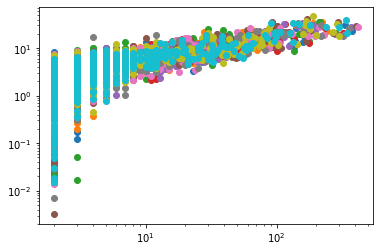

In [33]:
for i in range(10):
    plt.scatter(voids_SDSS[i]['N'], voids_SDSS[i]['SIGMA_R'])
    plt.loglog()

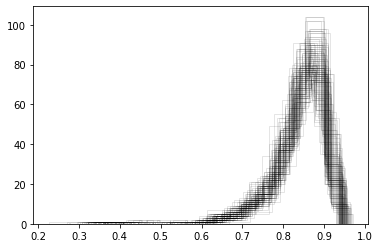

In [34]:
for i in range(100):
    ii = voids_SDSS[i]['N']>2
    ell = 1 - np.sqrt(voids_SDSS[i]['LAMBDA_3'][ii]/voids_SDSS[i]['LAMBDA_1'][ii])
    _ = plt.hist(ell, alpha=0.1, bins=15, histtype='step', color='black')

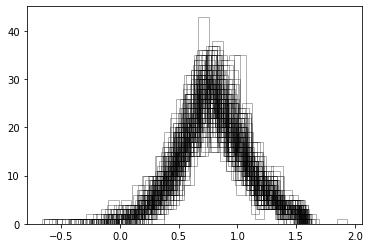

In [35]:
for i in range(100):
    ii = voids_SDSS[i]['N']>3
    _ = plt.hist(np.log10(voids_SDSS[i]['SIGMA_R'][ii]), 
                 alpha=0.3, log=False, bins=20, histtype='step', color='black')

In [36]:
eigen_values = {}

for v in range(100):
    n_points = len(voids_SDSS[v]['N'])
    eigen_1 = np.ones((n_points,3))
    for i in range(n_points):
        eigen_1[i] = np.fromstring(voids_SDSS[v]['EIGEN_1'][i][1:-1], sep=' ')
    
    eigen_values[v] = eigen_1

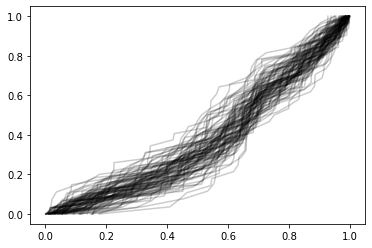

In [37]:
for v in range(100):
    ii = voids_SDSS[v]['N']>40
    component = eigen_values[v][ii,2]
    n = len(component)
    int_distro = np.linspace(0,1,n)
    x = np.sort(np.abs(component))
    plt.plot(x, int_distro, color='black', alpha=0.2)